# Government Spending shock

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find steady state and Jacobian](#toc2_)    
- 3. [Find IRF](#toc3_)    
- 4. [Figures](#toc4_)    
  - 4.1. [Long-view](#toc4_1_)    
  - 4.2. [National accouting - quantities](#toc4_2_)    
  - 4.3. [National accouting - prices](#toc4_3_)    
  - 4.4. [Labor market](#toc4_4_)    
  - 4.5. [Capital accumulation](#toc4_5_)    
  - 4.6. [Production firms](#toc4_6_)    
  - 4.7. [Phillips-Curve](#toc4_7_)    
  - 4.8. [Government](#toc4_8_)    
  - 4.9. [Households - aggregate](#toc4_9_)    
  - 4.10. [Households - life-cycle](#toc4_10_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
plt.style.use('seaborn-v0_8-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline')            #create baseline model

In [3]:
par = model.par                 #set model parameters
ss = model.ss                   #create namespace for steady state
sol = model.sol                 #create namespace for solution

## 2. <a id='toc2_'></a>[Find steady state and Jacobian](#toc0_)

In [4]:
model.find_ss()                 #find steady state 

In [5]:
model.calc_jac(do_print=True)   #calculate jacobian

Jacobian calculated in 1.0 mins 4 secs


## 3. <a id='toc3_'></a>[Find IRF](#toc0_)

In [6]:
model.set_exo_ss()              #set steady state exogenous variables

In [7]:
Tshock = 50                                                 #length of shock
persistence = 0.80**np.arange(Tshock)                       #persistence of shock        
model.sol.G[:Tshock] = model.ss.G*(1 + 0.01*persistence)    #shock to government spending

initial:
t1-t0 = 0.01130 secs
it = 3
    max. abs. error = 2.97e-12
    8.56e-14 in A_R_ini_error
    3.11e-15 in Aq_diff
    5.33e-15 in bargaining_cond
    2.22e-15 in FOC_capital_agency
    1.07e-12 in FOC_K_ell
    2.97e-12 in mkt_clearing
    3.33e-14 in PC

solve: t1-t0 = 0.12367 secs
evaluate + update: t3-t2 = 0.07979 secs


In [ ]:
model.find_IRF()                #find impulse response functions 

## 4. <a id='toc4_'></a>[Figures](#toc0_)

### 4.1. <a id='toc4_1_'></a>[Long-view](#toc0_)

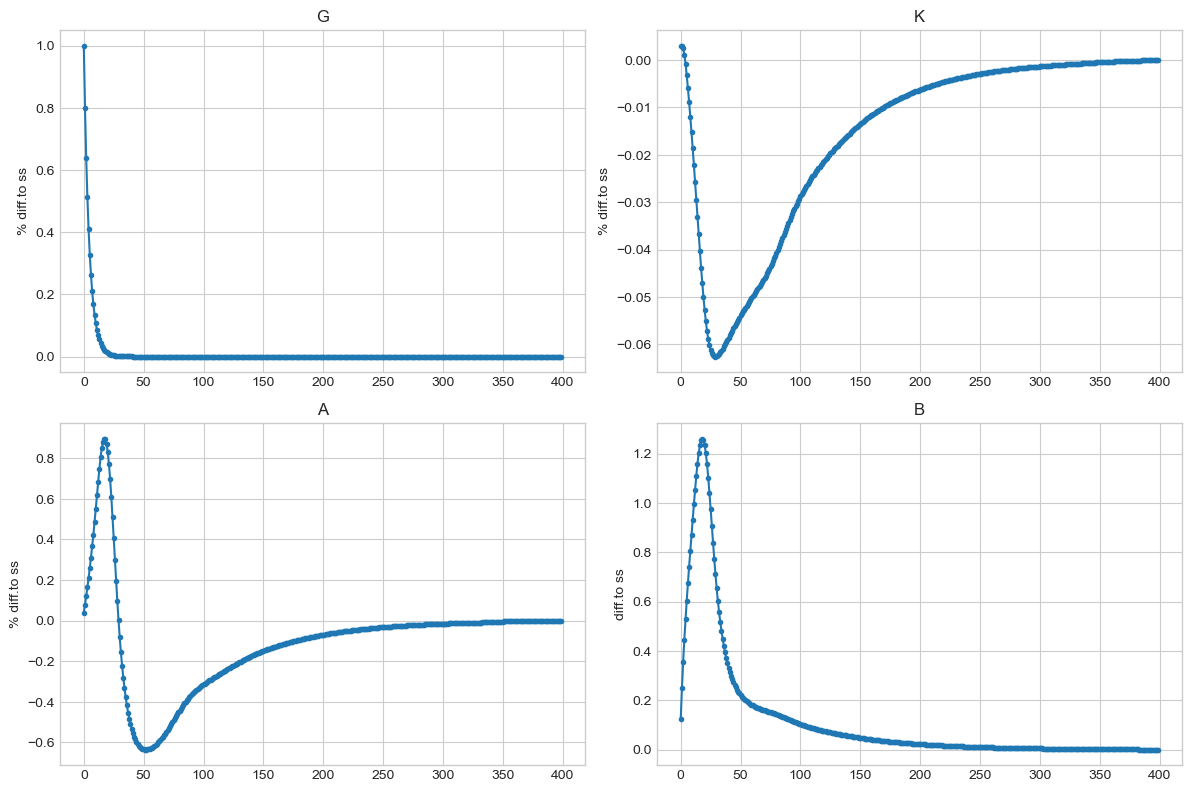

In [8]:
model.plot_IRF(varlist=['G','K','A','B'],T_IRF=par.T,ncol=2)

### 4.2. <a id='toc4_2_'></a>[National accouting - quantities](#toc0_)

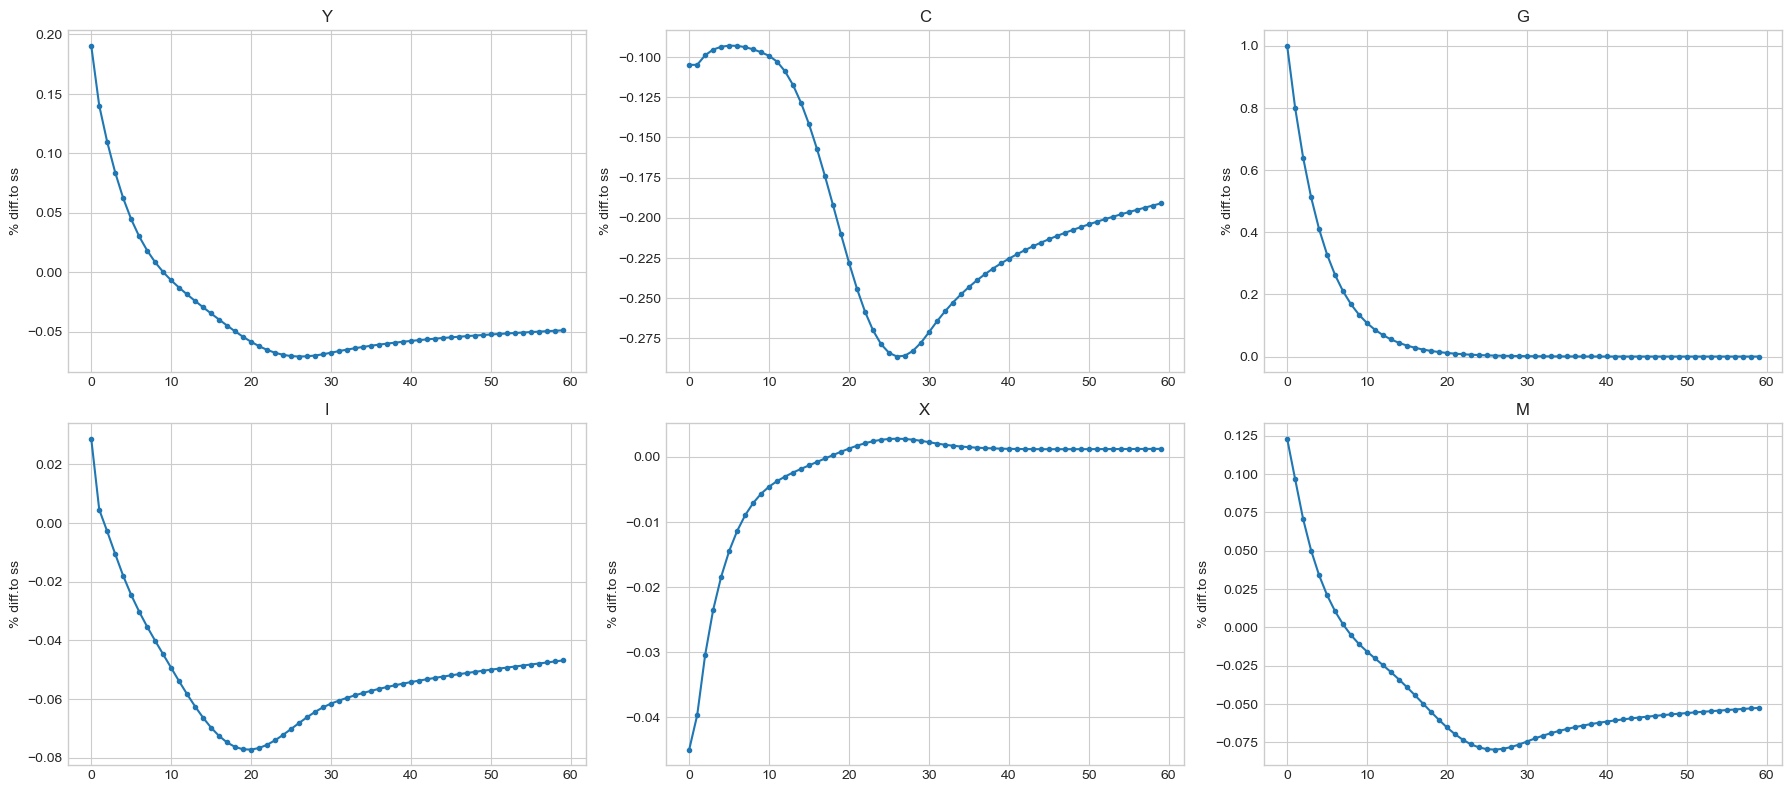

In [9]:
model.plot_IRF(varlist=['Y','C','G','I','X','M'])

### 4.3. <a id='toc4_3_'></a>[National accouting - prices](#toc0_)

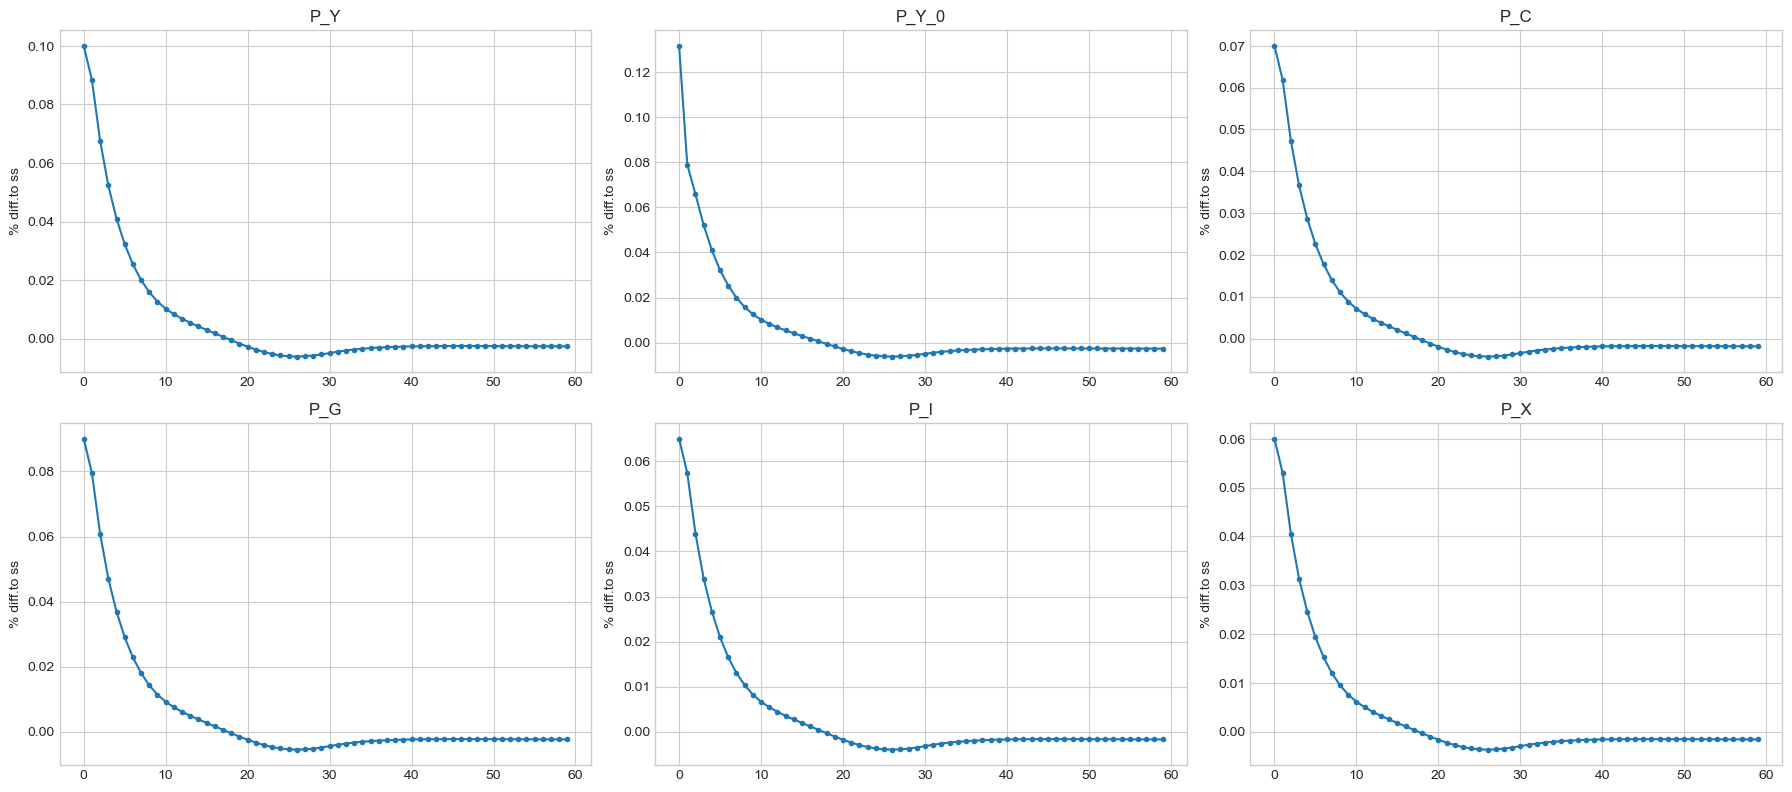

In [10]:
model.plot_IRF(varlist=['P_Y','P_C','P_G','P_I','P_X'])

### 4.4. <a id='toc4_4_'></a>[Labor market](#toc0_)

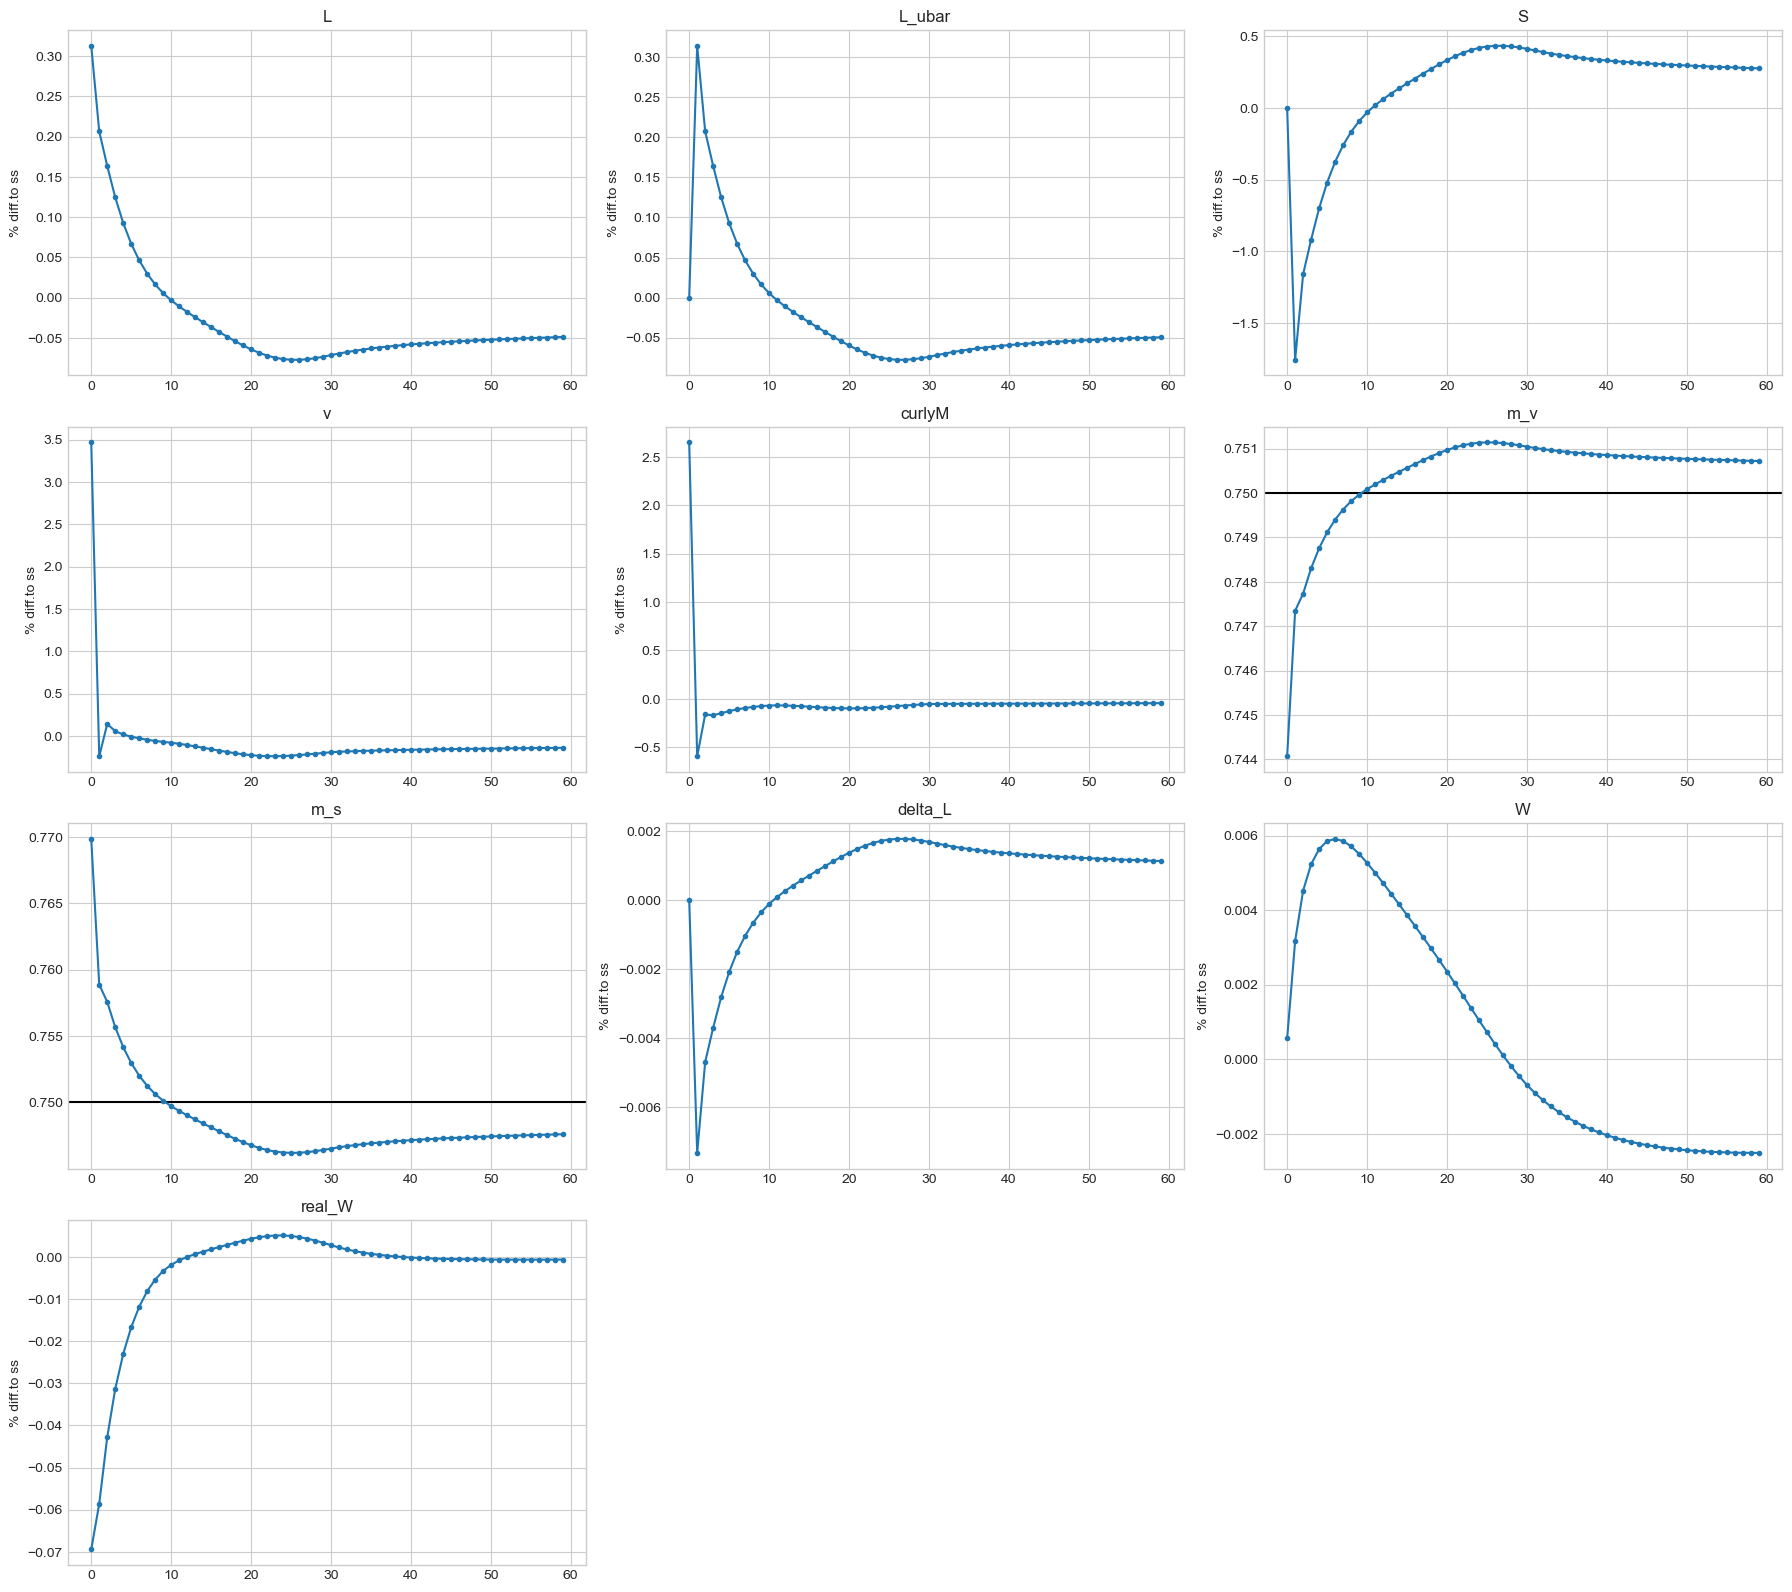

In [11]:
model.plot_IRF(varlist=['L','L_ubar','S','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'])

### 4.5. <a id='toc4_5_'></a>[Capital accumulation](#toc0_)

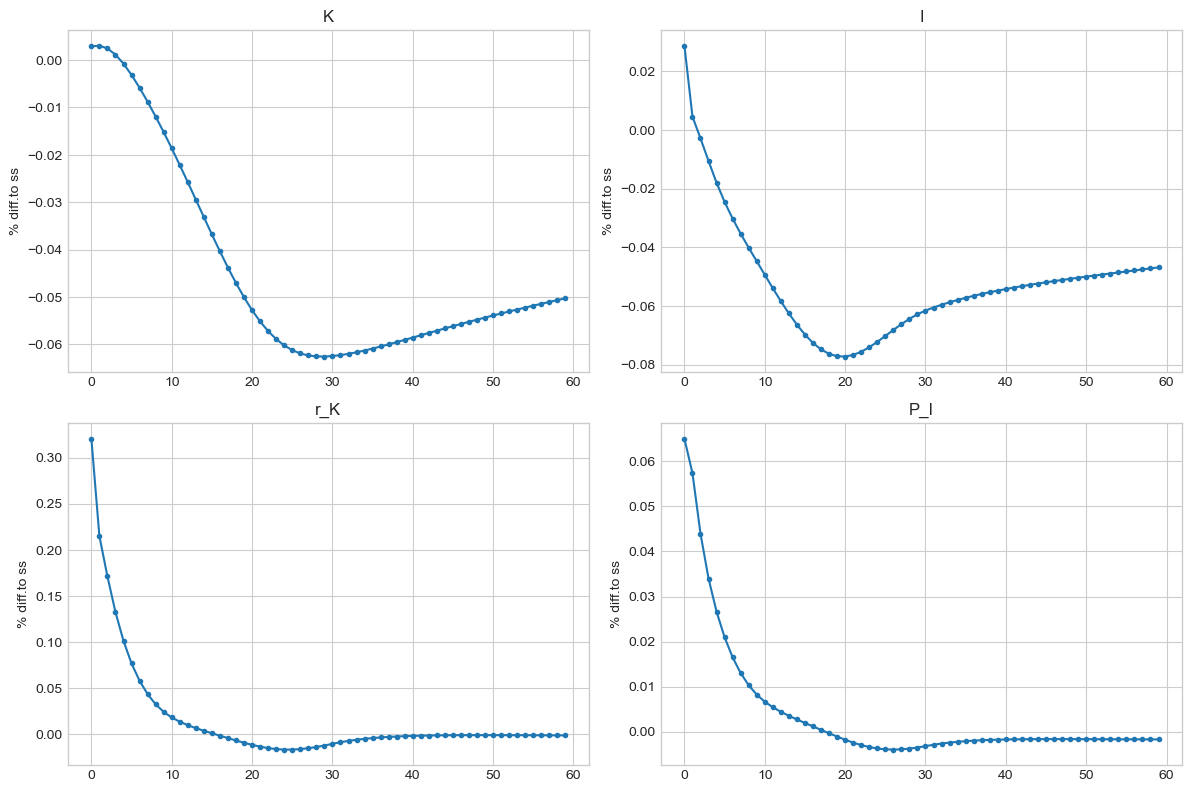

In [12]:
model.plot_IRF(varlist=['K','I','r_K','P_I'],ncol=2)

### 4.6. <a id='toc4_6_'></a>[Production firms](#toc0_)

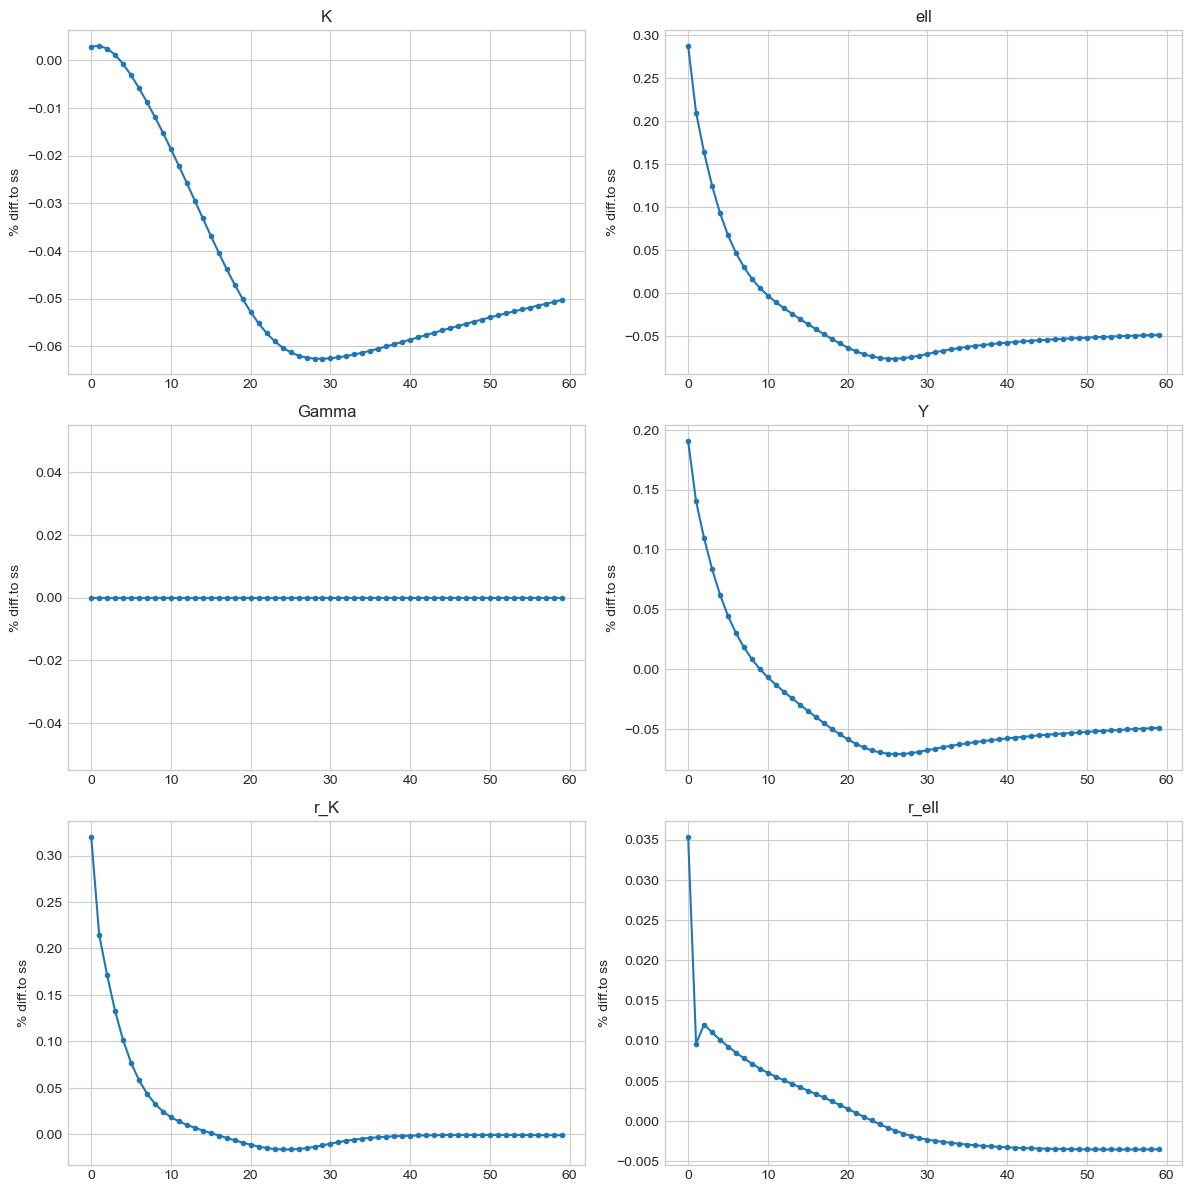

In [13]:
model.plot_IRF(varlist=['K','ell','Gamma','Y','r_K','r_ell'],ncol=2)

### 4.7. <a id='toc4_7_'></a>[Phillips-Curve](#toc0_)

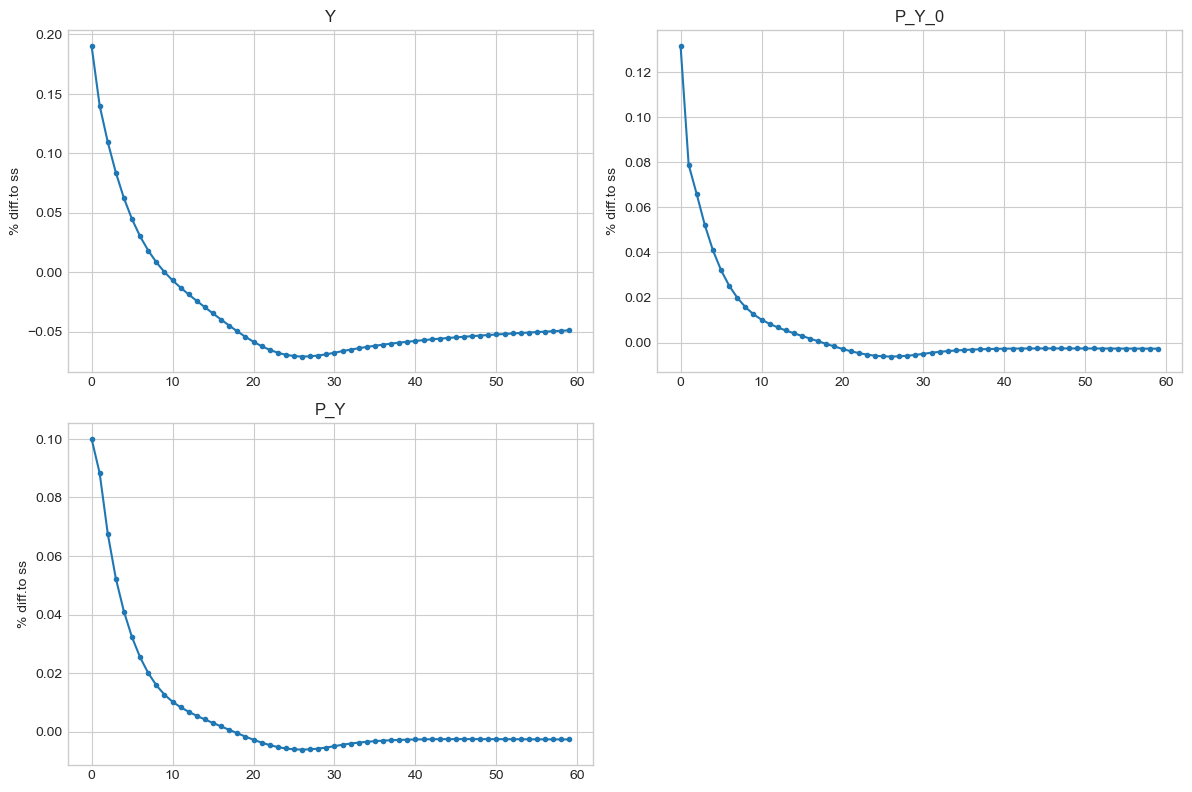

In [18]:
model.plot_IRF(varlist=['Y','P_Y_0','P_Y'],ncol=2)

### 4.8. <a id='toc4_8_'></a>[Government](#toc0_)

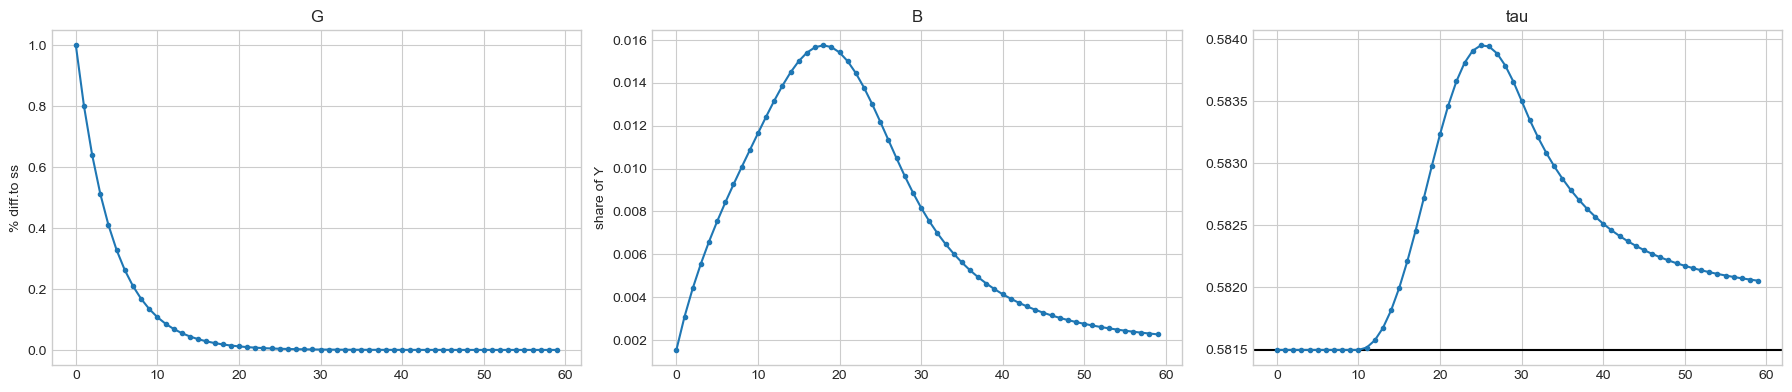

In [14]:
model.plot_IRF(varlist=['G','B','tau'],abs=['tau'],Y_share=['B'])

### 4.9. <a id='toc4_9_'></a>[Households - aggregate](#toc0_)

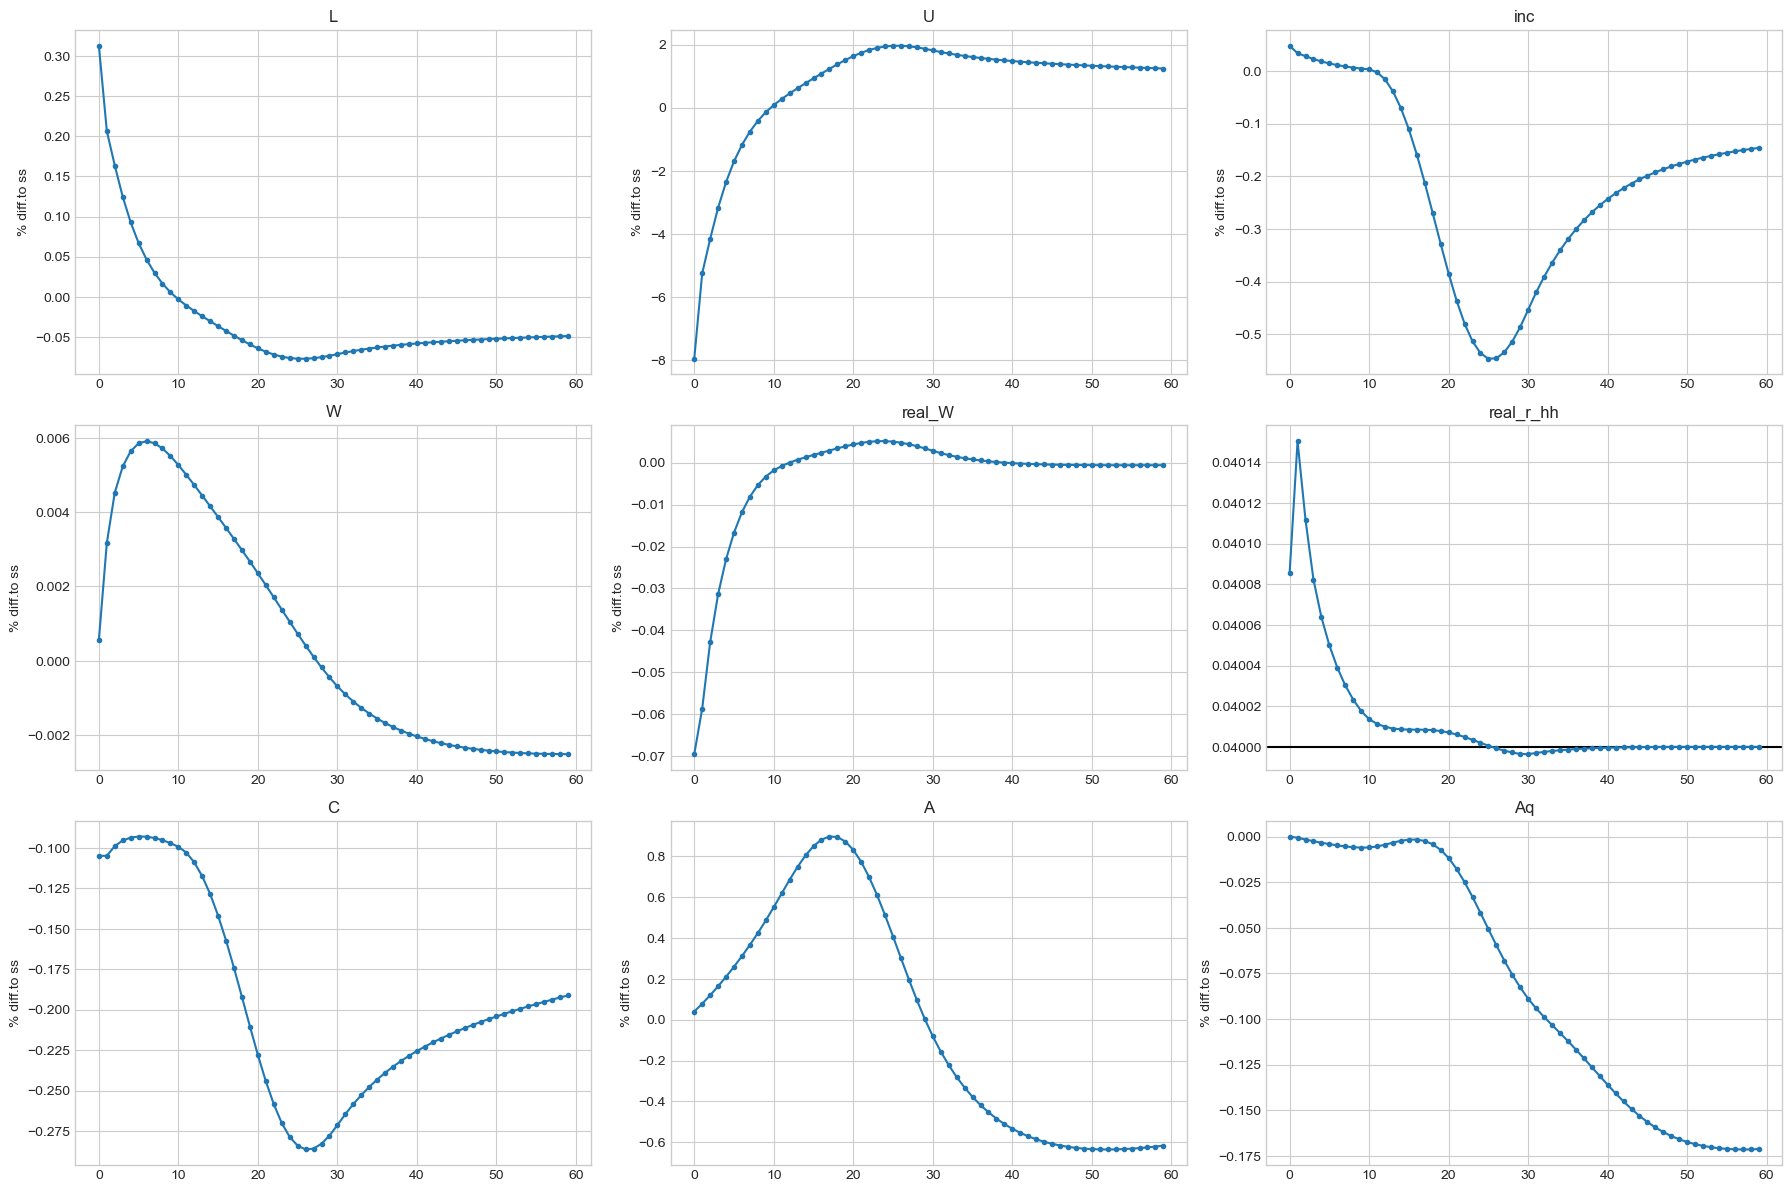

In [15]:
model.plot_IRF(varlist=['L','U','inc','W','real_W','real_r_hh','C','A','Aq'],ncol=3,abs=['real_r_hh'])

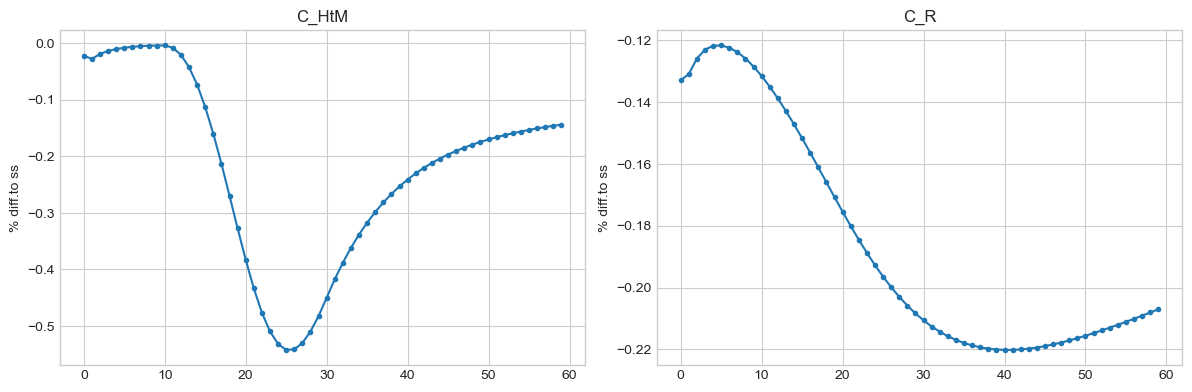

In [16]:
model.plot_IRF(varlist=['C_HtM','C_R'],ncol=2)

### 4.10. <a id='toc4_10_'></a>[Households - life-cycle](#toc0_)

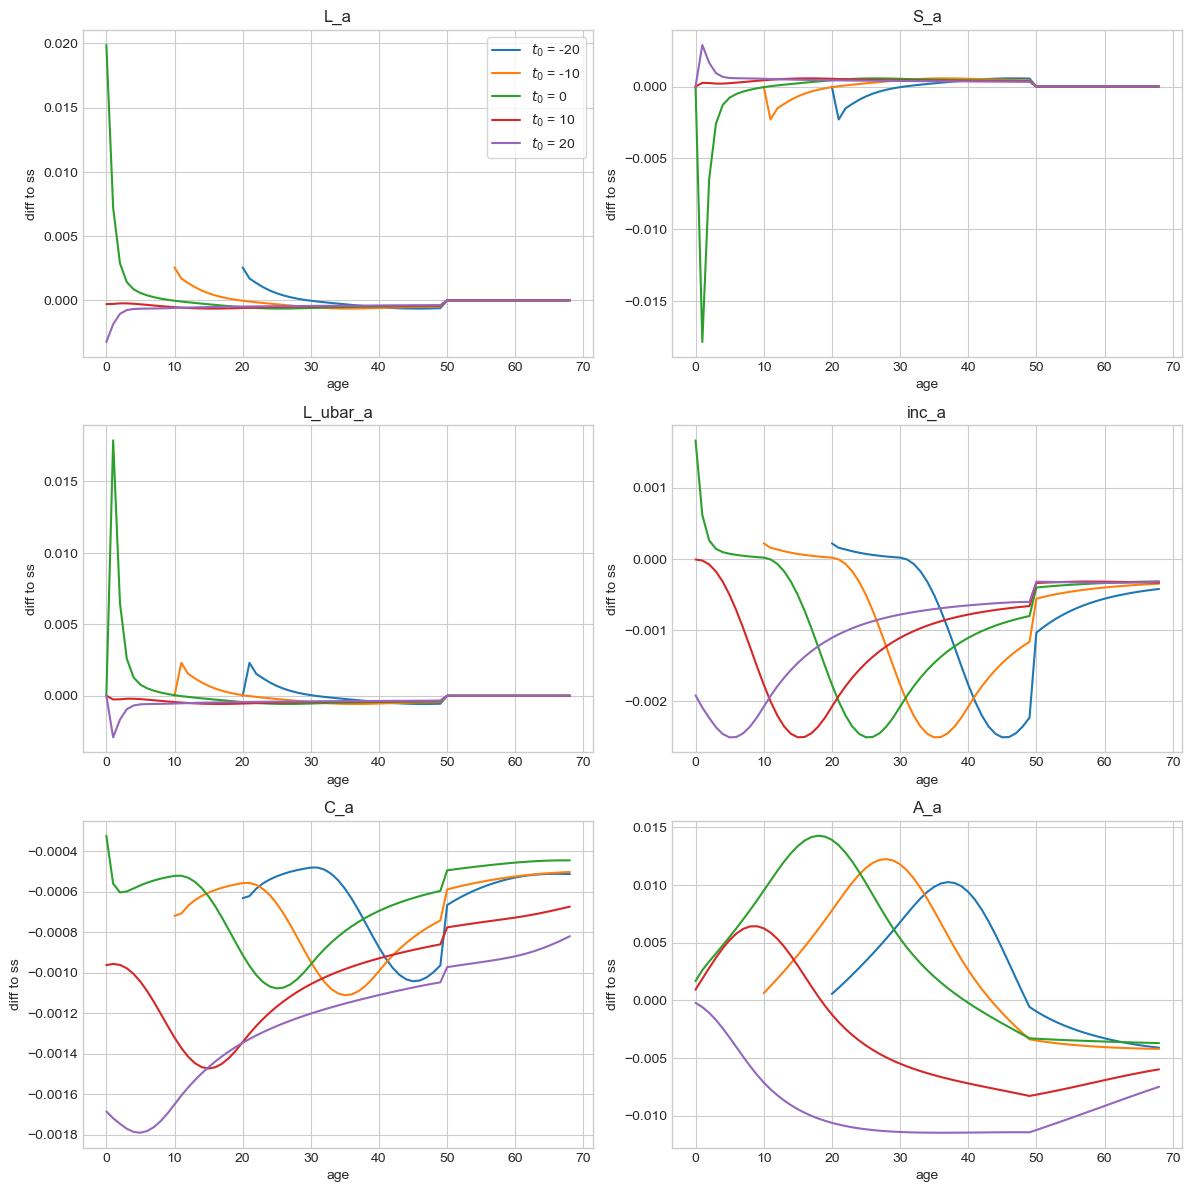

In [17]:
model.plot_IRF_hh(varlist=['L_a','S_a','L_ubar_a','inc_a','C_a','A_a'],t0_list=[-20,-10,0,10,20])